# Session 34 Neural network

#1. Classification

## read the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/BankChurners.csv', delimiter=',')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


## check persentase target class

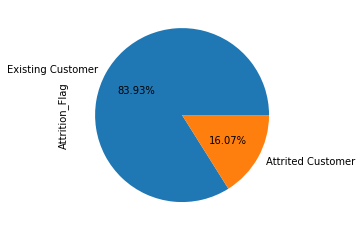

In [ ]:
import matplotlib.pyplot as plt

data = df['Attrition_Flag'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

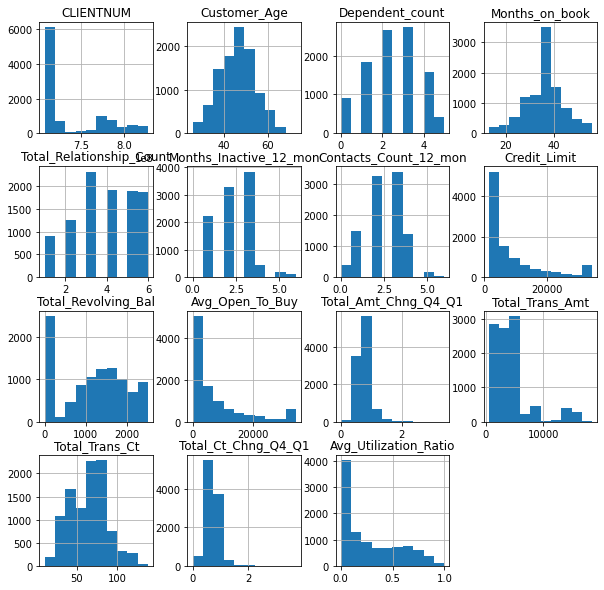

In [ ]:
df.hist(figsize=(10,10))
plt.show()

## check missing values

In [ ]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## check categorical attributes

In [ ]:
df_X = df.drop(['CLIENTNUM',	'Attrition_Flag'],axis=1)
df_y = df[['Attrition_Flag']]
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


## MLP for classification

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0      0.857     0.800     0.828       496
           1      0.962     0.974     0.968      2543

    accuracy                          0.946      3039
   macro avg      0.910     0.887     0.898      3039
weighted avg      0.945     0.946     0.945      3039

Accuracy  0.945705824284304
Precision  0.9615683229813664
Recall  0.9740464018875344
Confusion matrix  [[ 397   99]
 [  66 2477]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


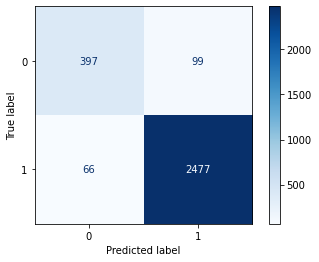

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# get X and y
df_X = df.drop(['CLIENTNUM',	'Attrition_Flag'],axis=1)
df_y = df[['Attrition_Flag']]

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train['Attrition_Flag'])
y_train=le.transform(y_train['Attrition_Flag'])
y_test=le.fit_transform(y_test['Attrition_Flag'])
#buat dataframe baru
X_train_enc, X_train_sc = X_train.copy(), X_train.copy()
X_test_enc, X_test_sc = X_test.copy(), X_train.copy()
#categorical encoding
cats = X_train.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
cat_en = LabelEncoder()
for i in cat_features:
  cat_en.fit(X_train[i].values.reshape(-1, 1))
  X_train_enc[i] = cat_en.transform(X_train[i].values.reshape(-1, 1))
  X_test_enc[i] = cat_en.transform(X_test[i].values.reshape(-1, 1))

#scaling
scaler = StandardScaler().fit(X_train_enc)
X_train_sc = scaler.transform(X_train_enc)
X_test_sc = scaler.transform(X_test_enc)

#mulai learning 
model=MLPClassifier(max_iter=1000)

#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train_sc, y_train)

y_pred = model.predict(X_test_sc)
print(classification_report(y_test, y_pred, digits=3))
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred))  
print('Recall ',recall_score(y_test, y_pred)) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test_sc, y_test, cmap=plt.cm.Blues)  
plt.show()

## Make prediction for the new data (Style biasa dan tidak memakai Pipeline)

In [ ]:
data = [{'Customer_Age':68, 'Gender':'F', 'Dependent_count':5, 'Education_Level':'Graduate', 
         'Marital_Status':'Single', 'Income_Category':'Less than $40K', 'Card_Category':'Blue',
         'Months_on_book':44, 'Total_Relationship_Count':6, 'Months_Inactive_12_mon':1, 
         'Contacts_Count_12_mon':2, 'Credit_Limit':8700,'Total_Revolving_Bal':800, 'Avg_Open_To_Buy':7392,
         'Total_Amt_Chng_Q4_Q1':1.541,'Total_Trans_Amt':1200,'Total_Trans_Ct':33,'Total_Ct_Chng_Q4_Q1':3.714,
         'Avg_Utilization_Ratio':0.10},
        {'Customer_Age':68, 'Gender':'F', 'Dependent_count':1, 'Education_Level':'High School', 
         'Marital_Status':'Single', 'Income_Category':'Less than $40K', 'Card_Category':'Blue',
         'Months_on_book':36, 'Total_Relationship_Count':5, 'Months_Inactive_12_mon':3, 
         'Contacts_Count_12_mon':4, 'Credit_Limit':5700,'Total_Revolving_Bal':0, 'Avg_Open_To_Buy':5700,
         'Total_Amt_Chng_Q4_Q1':0.541,'Total_Trans_Amt':12000,'Total_Trans_Ct':60,'Total_Ct_Chng_Q4_Q1':0.714,
         'Avg_Utilization_Ratio':0}]

df_input = pd.DataFrame(data)

#categorical encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
for i in cat_features:
  cat_en.fit(X_train[i].values.reshape(-1, 1))
  df_input[i] = cat_en.transform(df_input[i].values.reshape(-1, 1))

#scaling
df_input= scaler.transform(df_input)

result= model.predict(df_input)
for i in result:
  int_result = int(i)
  if (int_result == 0):
    decision = 'Existing Customer'
  elif (int_result==1):
    decision = 'Attrited Customer'
  else:
    decison = 'Not defined'
  print('Result prediction is ', decision)


Result prediction is  Attrited Customer
Result prediction is  Existing Customer


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 2. Regression

## read dataset


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/kc_house_data.csv', delimiter=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## check missing values

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

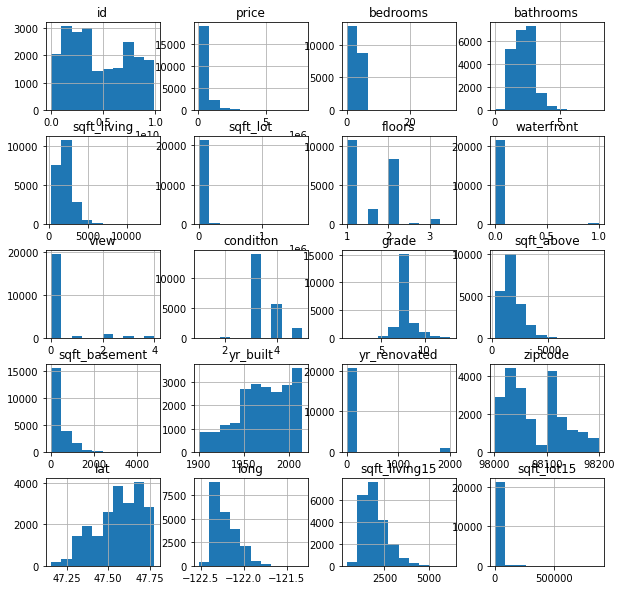

In [ ]:
df.hist(figsize=(10,10))
plt.show()

## check categorical attributes

In [ ]:
df_X = df.drop(['id','date','price'],axis=1)
df_y = df[['price']]
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index([], dtype='object')


## MLP for regression

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import numpy as np

df_X = df.drop(['id', 'date','price'], axis=1)
df_y = df['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = MLPRegressor()
reg.fit(X_train, y_train)

print('coef of determination training ',reg.score(X_train, y_train))
print('coef of determination testing ',reg.score(X_test, y_test))

print('prediction')
y_pred = reg.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.5723777176561771
coef of determination testing  0.5568942506412844
prediction
[ 499606.22332656  721781.1809578  1104978.15817922 1390591.09585568
  618013.91355252  401029.52921299  622263.3536957   491618.92354292
  446447.32830627  331025.05687609]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)

rmse :  252922.20180362492
r2 : 0.5568942506412844


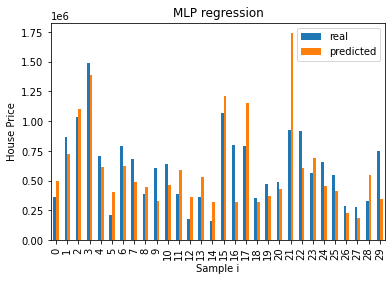

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data1 = pd.DataFrame(y_test[:30], columns = ['real'])
data2 = pd.DataFrame(y_pred[:30], columns = ['predicted'])
df_new = pd.concat([data1, data2], axis=1) 
df_new.plot(kind='bar') 

plt.title("MLP regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 

plt.show()